In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-71.89211603581101 87.73749735392084
-46.86082888931003 -148.05214372523724
25.73835910514221 -139.60169392862394
-57.7760021739504 103.63341962043529
13.94354649177123 13.016636672062958
-73.02005584283859 -2.317110612916622
-33.58986978536548 -38.9115823388953
72.55732966426623 59.48839719839404
7.727594413826424 0.5652894167874365
-52.25631555143981 -17.748000320954816
3.1391745100183357 -45.20178140132816
-11.021420482488963 6.509303680187912
-71.87460655420335 -107.78009048113468
11.729790225310964 141.11435967638857
66.37779222026094 -58.645526185769185
-62.10596105634181 46.26074140300517
8.953326837548886 18.13378275892819
-69.97281072334411 54.37901835354177
-68.36885426318 116.19584457678178
28.820649224259796 -4.367896904400226
-9.04872300587057 124.49939608787571
-24.380641417431548 153.7602687107253
72.87791394212957 -119.74117486790408
-30.083736086608745 140.16733488801685
-61.17666760728004 -127.15052643846627
-56.09500262792656 173.48097929215754
51.583686783882314 -90

In [5]:
# 6.1.5
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
#6.2.6

In [8]:
# Import requests library & API Key
import requests
from config import weather_api_key

In [9]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the url

# starting URL for Weather Map API Call
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

598

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") + "&units=imperial"

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | diffa
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | amderma
City not found. Skipping...
Processing Record 8 of Set 1 | badou
Processing Record 9 of Set 1 | salinopolis
Processing Record 10 of Set 1 | namibe
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | sisimiut
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | sarh
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | atambua
Processing Record 19 of Set 1 | hervey bay
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | broken hill
Processing Record 22 of Set 1 | rikitea
Processing Record 23

Processing Record 39 of Set 4 | aksarka
Processing Record 40 of Set 4 | kapoeta
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | sobolevo
Processing Record 44 of Set 4 | venice
Processing Record 45 of Set 4 | bereda
Processing Record 46 of Set 4 | samusu
City not found. Skipping...
Processing Record 47 of Set 4 | jerantut
Processing Record 48 of Set 4 | pilar
Processing Record 49 of Set 4 | atar
Processing Record 50 of Set 4 | lasa
Processing Record 1 of Set 5 | dong xoai
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | tostamaa
City not found. Skipping...
Processing Record 4 of Set 5 | krasnyy chikoy
Processing Record 5 of Set 5 | bambous virieux
Processing Record 6 of Set 5 | tuatapere
Processing Record 7 of Set 5 | khatanga
Processing Record 8 of Set 5 | garowe
Processing Record 9 of Set 5 | batabano
Processing Record 10 of Set 5 | douglas
Processing Record 11

City not found. Skipping...
Processing Record 27 of Set 8 | san pedro
Processing Record 28 of Set 8 | tibati
Processing Record 29 of Set 8 | nangomba
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | rapid city
Processing Record 32 of Set 8 | hofn
Processing Record 33 of Set 8 | mananjary
Processing Record 34 of Set 8 | michurinsk
Processing Record 35 of Set 8 | mineros
Processing Record 36 of Set 8 | soyo
Processing Record 37 of Set 8 | hokitika
Processing Record 38 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 39 of Set 8 | karaul
City not found. Skipping...
Processing Record 40 of Set 8 | santa cruz
Processing Record 41 of Set 8 | batagay-alyta
Processing Record 42 of Set 8 | lata
Processing Record 43 of Set 8 | taltal
Processing Record 44 of Set 8 | atocha
Processing Record 45 of Set 8 | sungaipenuh
Processing Record 46 of Set 8 | ukiah
Processing Record 47 of Set 8 | cabedelo
Processing Record 48 of Set 8 | gorontalo
Proc

Processing Record 14 of Set 12 | roald
Processing Record 15 of Set 12 | jian
Processing Record 16 of Set 12 | rocha
Processing Record 17 of Set 12 | xiongzhou
Processing Record 18 of Set 12 | eston
Processing Record 19 of Set 12 | safranbolu
Processing Record 20 of Set 12 | manokwari
Processing Record 21 of Set 12 | sikasso
Processing Record 22 of Set 12 | dien bien
City not found. Skipping...
Processing Record 23 of Set 12 | palestine
Processing Record 24 of Set 12 | monster
Processing Record 25 of Set 12 | freeport
Processing Record 26 of Set 12 | sembe
Processing Record 27 of Set 12 | hami
Processing Record 28 of Set 12 | inuvik
Processing Record 29 of Set 12 | broome
Processing Record 30 of Set 12 | wad rawah
Processing Record 31 of Set 12 | ruteng
Processing Record 32 of Set 12 | ereymentau
Processing Record 33 of Set 12 | santo antonio do ica
Processing Record 34 of Set 12 | kadrina
Processing Record 35 of Set 12 | quang ngai
Processing Record 36 of Set 12 | mentok
City not found

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,56.97,76,61,3.71,AU,2022-10-20 23:12:45
1,Mataura,-46.1927,168.8643,50.14,41,71,5.91,NZ,2022-10-20 23:17:10
2,Hilo,19.7297,-155.0900,88.29,70,0,12.66,US,2022-10-20 23:14:34
3,Diffa,13.3154,12.6113,84.79,21,92,8.41,NE,2022-10-20 23:17:11
4,Hermanus,-34.4187,19.2345,56.66,85,68,9.55,ZA,2022-10-20 23:17:12
5,Arraial Do Cabo,-22.9661,-42.0278,73.18,86,7,31.27,BR,2022-10-20 23:17:13
6,Badou,7.5833,0.6000,72.75,85,68,2.46,TG,2022-10-20 23:17:14
7,Salinopolis,-0.6136,-47.3561,81.21,79,46,13.04,BR,2022-10-20 23:17:14
8,Namibe,-15.1961,12.1522,66.87,81,77,5.48,AO,2022-10-20 23:17:15
9,Punta Arenas,-53.1500,-70.9167,42.91,65,20,37.98,CL,2022-10-20 23:17:15


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
#6.3.1

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

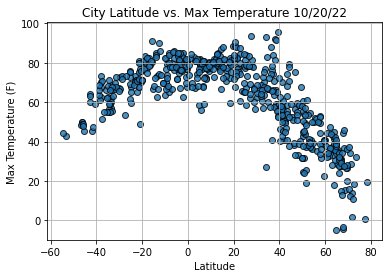

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

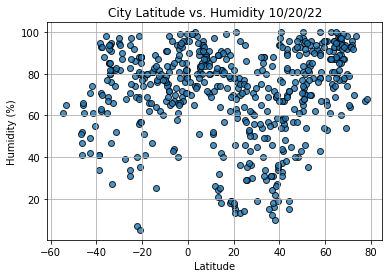

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

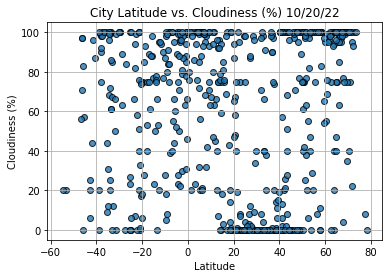

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

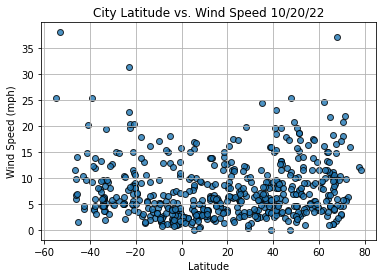

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
#6.4.2

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[13]
index13

City                         Sarh
Lat                        9.1429
Lng                       18.3923
Max Temp                    75.87
Humidity                       71
Cloudiness                     93
Wind Speed                   4.81
Country                        TD
Date          2022-10-20 23:17:18
Name: 13, dtype: object

In [24]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
543     True
544     True
545     True
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Hilo,19.7297,-155.0900,88.29,70,0,12.66,US,2022-10-20 23:14:34
3,Diffa,13.3154,12.6113,84.79,21,92,8.41,NE,2022-10-20 23:17:11
6,Badou,7.5833,0.6000,72.75,85,68,2.46,TG,2022-10-20 23:17:14
11,Sisimiut,66.9395,-53.6735,27.52,60,100,8.90,GL,2022-10-20 23:17:17
13,Sarh,9.1429,18.3923,75.87,71,93,4.81,TD,2022-10-20 23:17:18


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

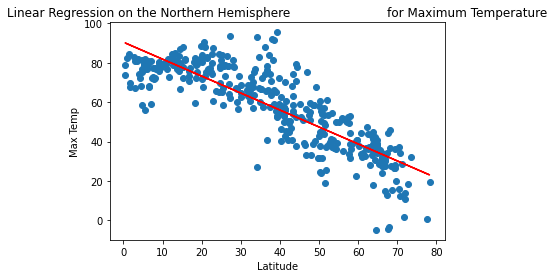

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,260))

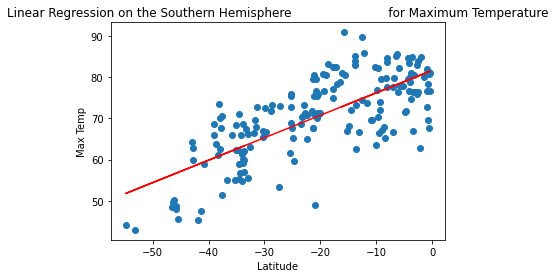

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,280))

In [29]:
#6.4.3

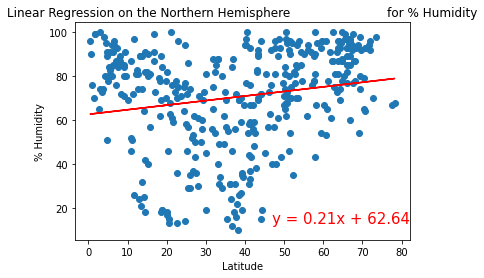

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(47,13))

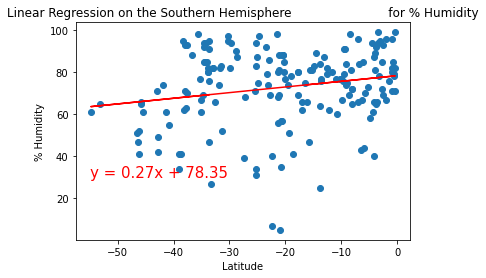

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,30))

In [32]:
#6.4.4

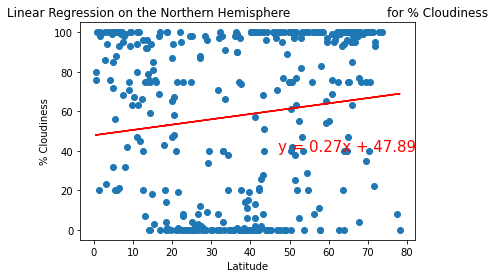

In [33]:
#skill drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(47,40))

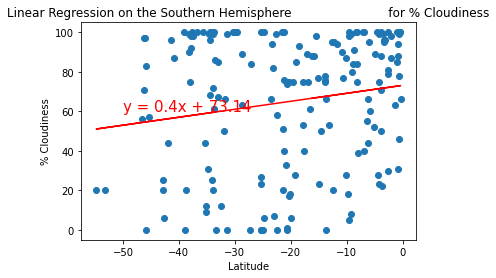

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [35]:
#6.4.5

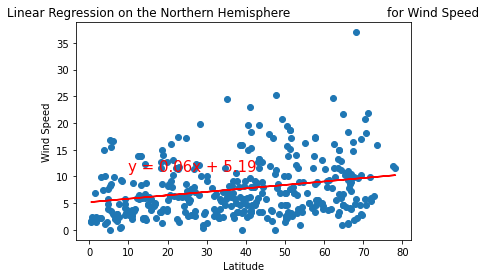

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,11))

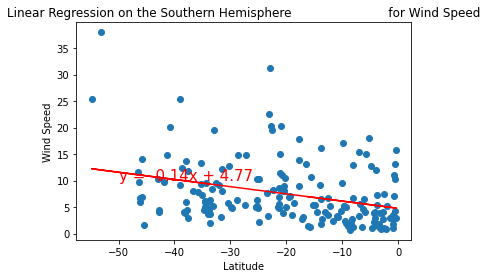

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,10))

In [38]:
#6.5.3

In [39]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [40]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.count()

City          172
Lat           172
Lng           172
Max Temp      172
Humidity      172
Cloudiness    172
Wind Speed    172
Country       172
Date          172
dtype: int64